# Cross Validation

Goal: Use the mpg dataset and predict whether a car has automatic or manual transmission.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Acquire

In [3]:
#load mpg data
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

## Prepare

In [6]:
#change trans column to auto and manual
df.trans = np.where(df.trans.str.startswith('auto'), 'auto', 'manual')

In [7]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


## Model

In [10]:
#split into X and y
X = df[['displ', 'year', 'cyl', 'cty', 'hwy']]
X.head()

,displ,year,cyl,cty,hwy
1,1.8,1999,4,18,29
2,1.8,1999,4,21,29
3,2.0,2008,4,20,31
4,2.0,2008,4,21,30
5,2.8,1999,6,16,26


In [13]:
y = df.trans
y.head()

1      auto
2    manual
3    manual
4      auto
5      auto
Name: trans, dtype: object

In [31]:
#split into trains and tests
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=123)

In [32]:
X_train.shape

(175, 5)

In [33]:
X_test.shape

(59, 5)

## further split by hand

In [34]:
#get the validates
X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                            y_train, test_size=.30, random_state=123)

In [35]:
X_train.shape

(122, 5)

In [36]:
X_validate.shape

(53, 5)

In [37]:
X_test.shape

(59, 5)

#### use decision tree for predicting target variable

In [38]:
tree = DecisionTreeClassifier(max_depth=3)

In [39]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
tree.score(X_train, y_train)

0.6967213114754098

In [41]:
tree.score(X_validate, y_validate)

0.6415094339622641

In [43]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9836065573770492

In [44]:
tree.score(X_validate, y_validate)

0.6792452830188679

## `cross_val_score`

`cross_val_score` is a function in the scikit-learn package which trains and tests a model over multiple folds of your dataset. 

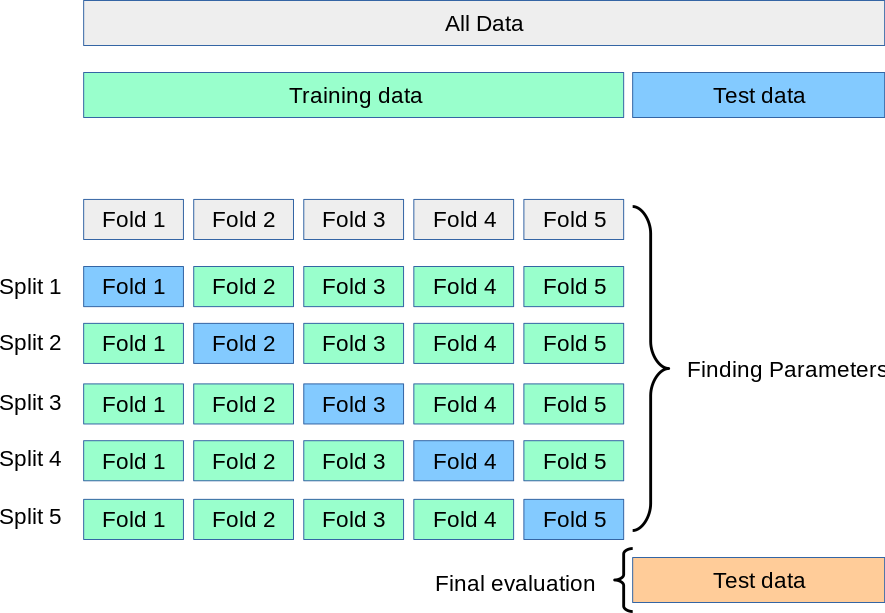

If you define a cv number in the `cross_val_score` function, and are using a classification model, the folds will utilize `StratifiedKFold` which will stratify your target variable

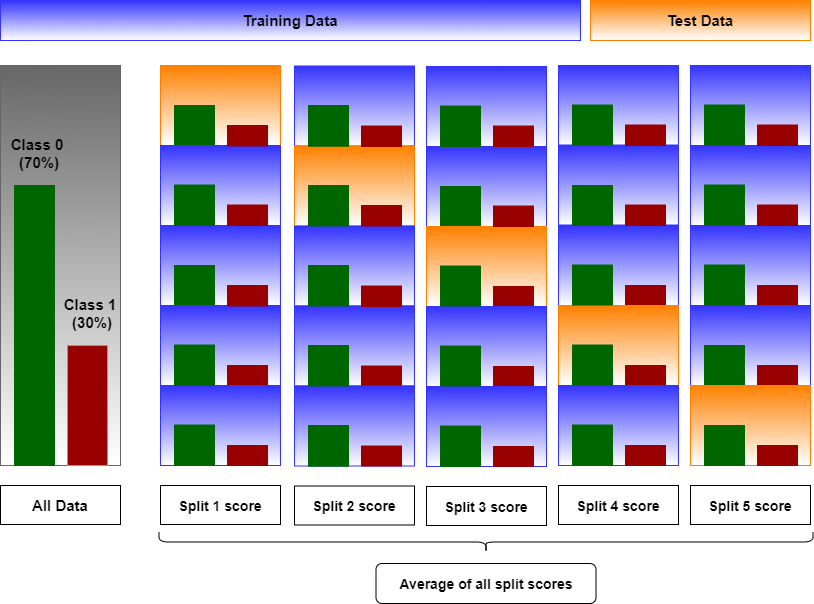

In [45]:
#import
from sklearn.model_selection import cross_val_score

In [46]:
tree = DecisionTreeClassifier(max_depth=4, random_state=123)

In [54]:
cross_val_score(tree, X_train, y_train, cv=5)

array([0.72      , 0.56      , 0.58333333, 0.66666667, 0.54166667])

In [55]:
cross_val_score(tree, X_train, y_train, cv=5).mean()

0.6143333333333333

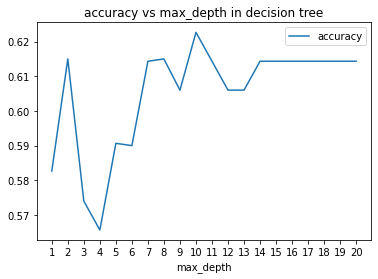

In [61]:
results = []

for x in range(1,21):
    tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    score = cross_val_score(tree, X_train, y_train, cv=5).mean()
    results.append([x, score])
    
pd.DataFrame(results, columns = ['max_depth','accuracy'])\
.set_index('max_depth').plot(xticks=range(1,21))
plt.title('accuracy vs max_depth in decision tree')
plt.show()

## Grid Search

`GridSearchCV` (grid search cross validation) class lets us quickly try out many different combinations of hyper parameters

In [62]:
#import
from sklearn.model_selection import GridSearchCV

#### cycle through 1 - 20 neighbors

In [64]:
knn = KNeighborsClassifier()

Setting up grid search 
- keys are the names of hyperparameters
- values are the range of values to search through

In [66]:
params = {'n_neighbors': range(1,21)}
params

{'n_neighbors': range(1, 21)}

In [68]:
grid = GridSearchCV(knn, params, cv=5)

In [69]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [71]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [73]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [74]:
grid.cv_results_['mean_test_score']

array([0.516     , 0.60666667, 0.616     , 0.64      , 0.566     ,
       0.63066667, 0.58966667, 0.61466667, 0.639     , 0.63966667,
       0.60733333, 0.60666667, 0.59033333, 0.61566667, 0.60766667,
       0.61466667, 0.623     , 0.607     , 0.59033333, 0.56633333])

In [77]:
grid.best_score_

0.6399999999999999

In [78]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [81]:
#save into varible to run on test data
knn_model = grid.best_estimator_

In [82]:
knn_model.score(X_test, y_test)

0.6610169491525424

#### cycle through multiple parameters

In [90]:
dt = DecisionTreeClassifier(random_state=123)

In [91]:
params = {'max_depth':range(1,21),
         'min_samples_leaf':range(1,11),
         'criterion':['gini','entropy']}

In [93]:
grid = GridSearchCV(dt, params, cv=5)

In [94]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [97]:
grid.cv_results_['params'][:5]

[{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5}]

In [99]:
grid.cv_results_['mean_test_score'][:5]

array([0.58266667, 0.58266667, 0.58266667, 0.58266667, 0.58266667])

In [100]:
params

{'max_depth': range(1, 21),
 'min_samples_leaf': range(1, 11),
 'criterion': ['gini', 'entropy']}

In [101]:
for params, score in zip(grid.cv_results_['params'], 
                         grid.cv_results_['mean_test_score']):
    params['score'] = score

In [107]:
pd.DataFrame(grid.cv_results_['params']).sort_values('score')

,criterion,max_depth,min_samples_leaf,score
225,entropy,3,6,0.532667
224,entropy,3,5,0.540667
226,entropy,3,7,0.541667
228,entropy,3,9,0.541667
238,entropy,4,9,0.541667
...,...,...,...,...
83,gini,9,4,0.672000
73,gini,8,4,0.672000
113,gini,12,4,0.672000
143,gini,15,4,0.672000


#### Use `grid.best_estimator` to save best hyperparameters

In [114]:
dt_model = grid.best_estimator_
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)

#### Try your model on unseen data. Test only on one model!!!

In [115]:
dt_model.score(X_test, y_test)

0.6779661016949152